In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [9]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

<b> Dsipaly top 5 rows</b>

In [10]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


<b> Display last 5 rows </b>

In [13]:
data.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


<b>find shape of data set it is an attribute</b>

In [14]:
data.shape

(6454, 5)

In [15]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 6454
Number of columns 5


<b> Check data info</b>

In [27]:
data.info

<bound method DataFrame.info of       year      state     month  number       date
0     1998       Acre   Janeiro     0.0 1998-01-01
1     1999       Acre   Janeiro     0.0 1999-01-01
2     2000       Acre   Janeiro     0.0 2000-01-01
3     2001       Acre   Janeiro     0.0 2001-01-01
4     2002       Acre   Janeiro     0.0 2002-01-01
...    ...        ...       ...     ...        ...
6449  2012  Tocantins  Dezembro   128.0 2012-01-01
6450  2013  Tocantins  Dezembro    85.0 2013-01-01
6451  2014  Tocantins  Dezembro   223.0 2014-01-01
6452  2015  Tocantins  Dezembro   373.0 2015-01-01
6453  2016  Tocantins  Dezembro   119.0 2016-01-01

[6422 rows x 5 columns]>

<b> remove duplicate data</b>

In [18]:
dup_data=data.duplicated().any()

In [20]:
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [23]:
data = data.drop_duplicates()

In [26]:
data.shape

(6422, 5)

<b> Check Null Values</b>

In [30]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

Describe data

In [34]:
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


<b>Renmae months to english</b>

In [38]:
data["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [39]:
data['new_month']=data['month'].map({'Janeiro':'jan', 
                          'Fevereiro':'feb',
                          'Março':'mar',
                          'Abril':'apr',
                          'Maio':'may', 
                          'Junho':'jun',
                          'Julho':'jul',
                         'Agosto':'aug',
                          'Setembro':'sep', 
                          'Outubro':'oct', 
                          'Novembro':'nov',
                          'Dezembro':'dec'
                         })

In [41]:
data['new_month']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
6449    dec
6450    dec
6451    dec
6452    dec
6453    dec
Name: new_month, Length: 6422, dtype: object

<b>total nu,ber of fires registered</b>

In [45]:
data.shape

(6422, 6)

<b>Max number of forist fores reported</b>

In [48]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [52]:
data1= data.groupby('new_month')['number'].sum().reset_index()
data1

,new_month,number
0,apr,28184.770
1,aug,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,jul,92319.113
6,jun,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


<AxesSubplot: xlabel='new_month', ylabel='number'>

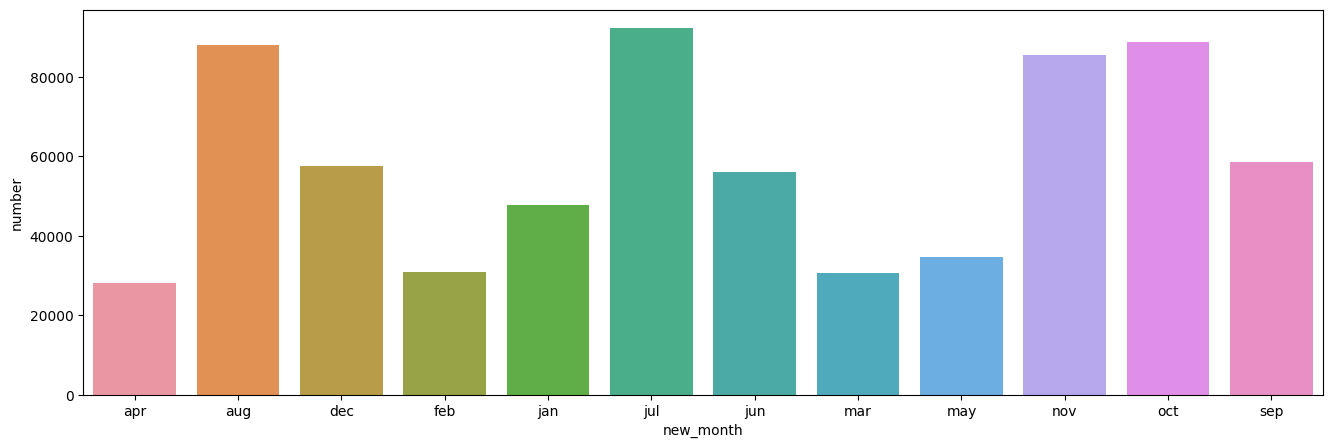

In [57]:
plt.figure(figsize=(16,5))
sns.barplot(x="new_month",y="number",data=data1)

<b>Max forest fire in year</b>

In [58]:
data1= data.groupby('year')['number'].sum().reset_index()
data1

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot: xlabel='year', ylabel='number'>

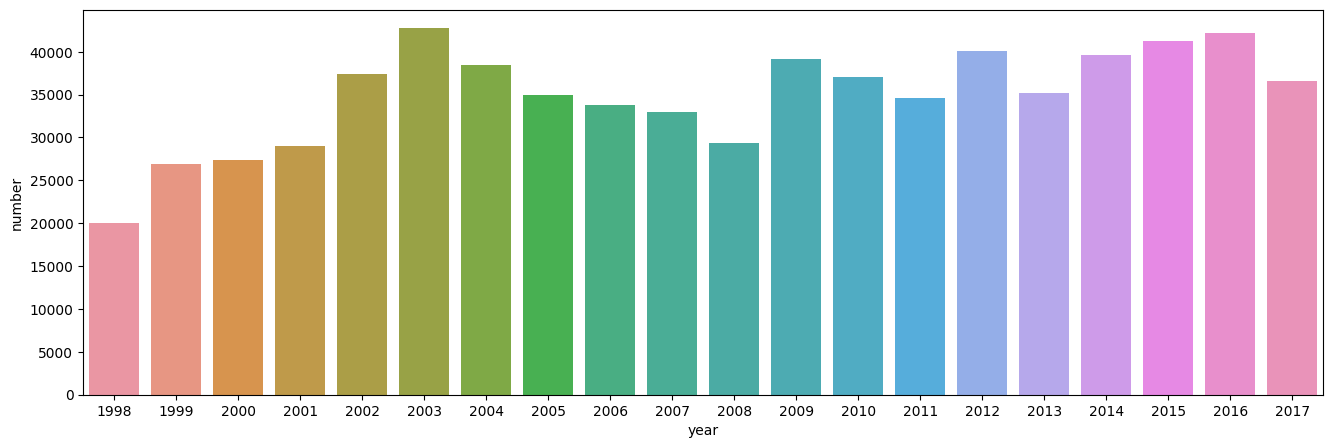

In [59]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data1)

<b> max in a state </b>

In [60]:
data1= data.groupby('state')['number'].sum().reset_index()
data1

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<AxesSubplot: xlabel='state', ylabel='number'>

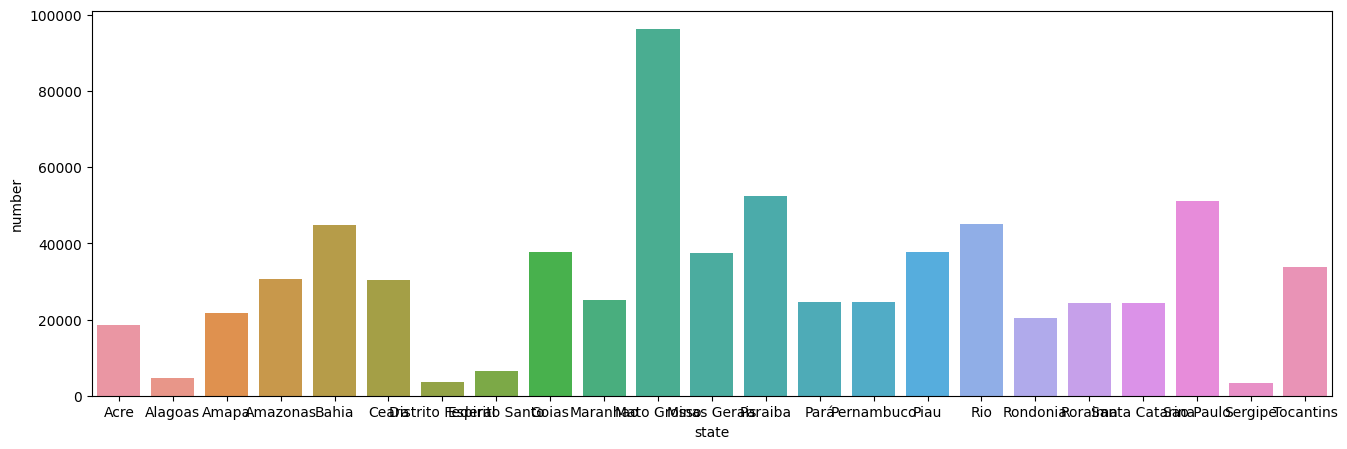

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data1)

<b> Total number of forest fire in amazonas </b>

In [63]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

<b>Year wise</b>

In [72]:
data4 = data[data['state']=="Amazonas"]
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot: xlabel='year', ylabel='number'>

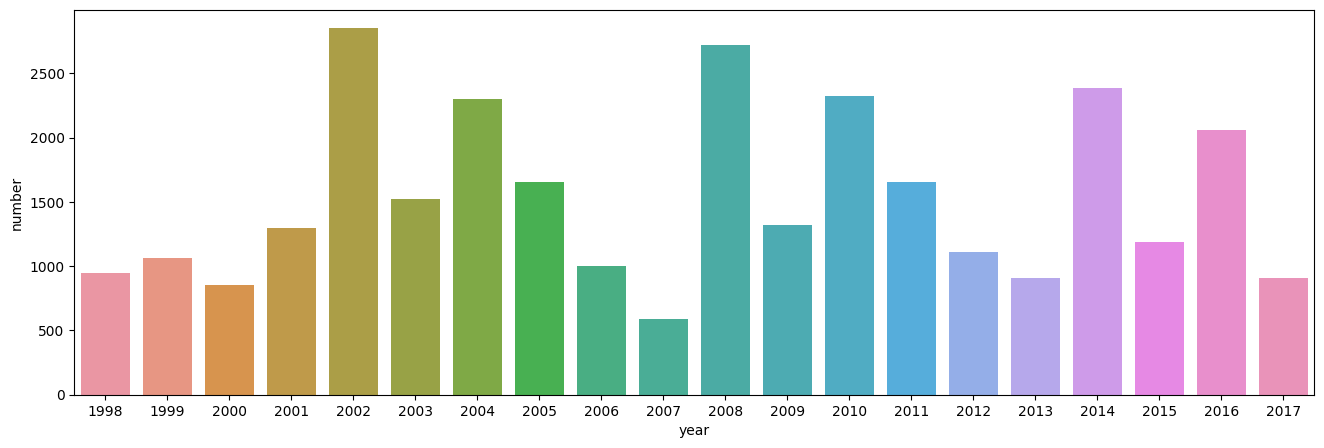

In [76]:
plt.figure(figsize=(16,5))
sns.barplot(x="year", y="number",data=data5)

<b>in year 2015</b>

In [86]:
fire = data[data['year']==2015].groupby('new_month')['number'].sum().reset_index()

In [87]:
fire

,new_month,number
0,apr,2573.000
1,aug,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,jul,4364.392
6,jun,3260.552
7,mar,2202.000
8,may,2384.000
9,nov,4034.518


<b> fire reported state wise high to low </b>

In [89]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [95]:
data8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


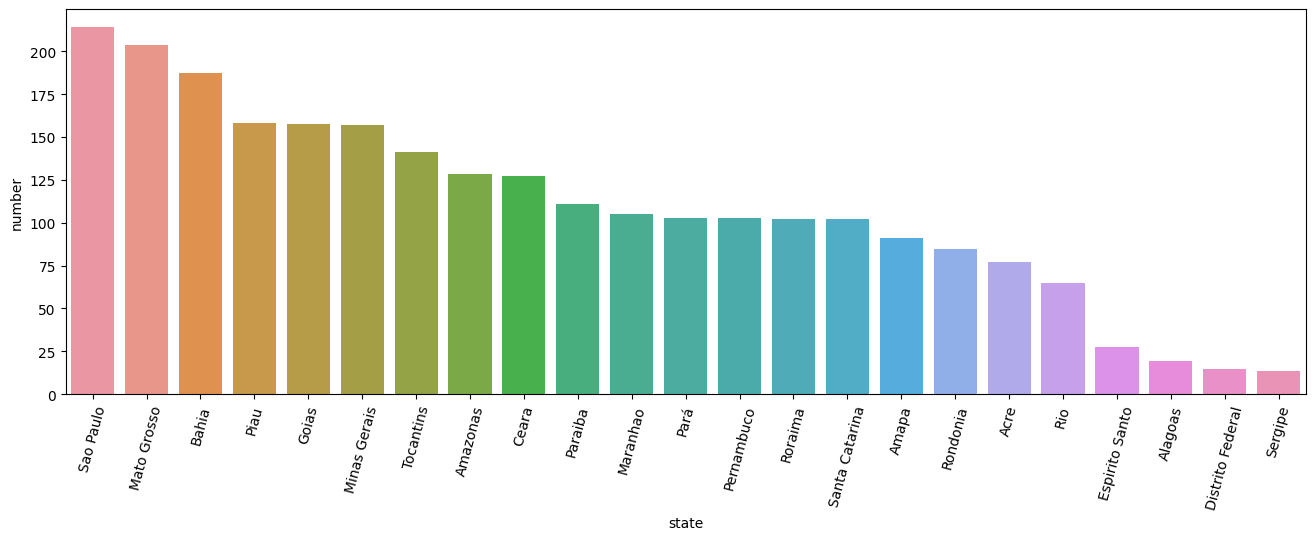

In [98]:
plt.figure(figsize=(16,5))
sns.barplot(x="state", y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

<b>States where fires where reported in dec month </b>

In [99]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [100]:
data[data['new_month']=="dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)